/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4099 - loss: 1.9502 - val_accuracy: 0.5865 - val_loss: 1.1686
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5999 - loss: 1.0595 - val_accuracy: 0.6373 - val_loss: 0.8714
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6751 - loss: 0.8015 - val_accuracy: 0.7475 - val_loss: 0.7076
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7658 - loss: 0.6616 - val_accuracy: 0.8104 - val_loss: 0.5865
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8205 - loss: 0.5383 - val_accuracy: 0.8159 - val_loss: 0.5129
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8161 - loss: 0.4780 - val_accuracy: 0.8291 - val_loss: 0.4511
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8414 - loss: 0.4167 - val_accuracy: 0.8467 - val_loss: 0.3985
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8608 - loss: 0.3642 - val_accuracy:

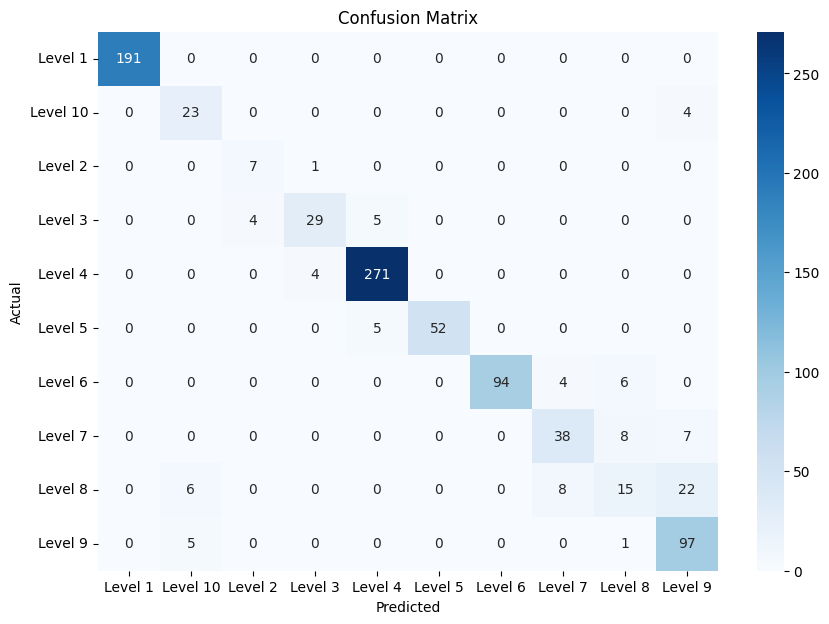

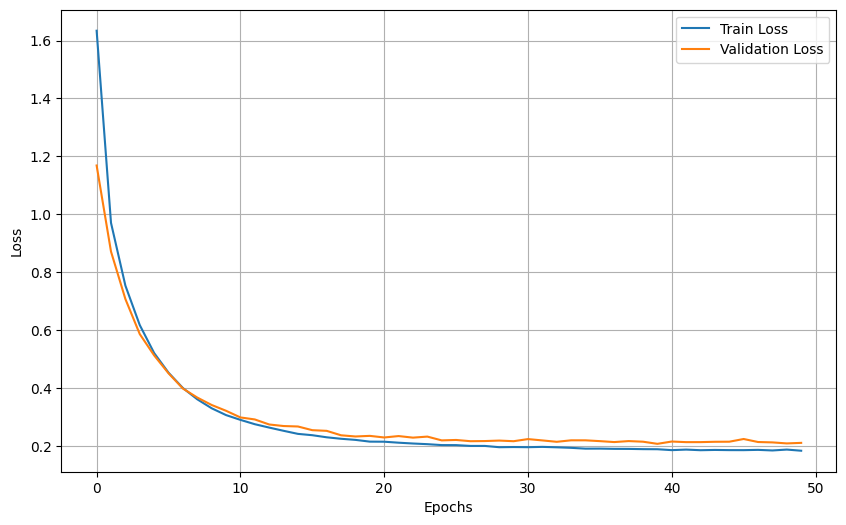

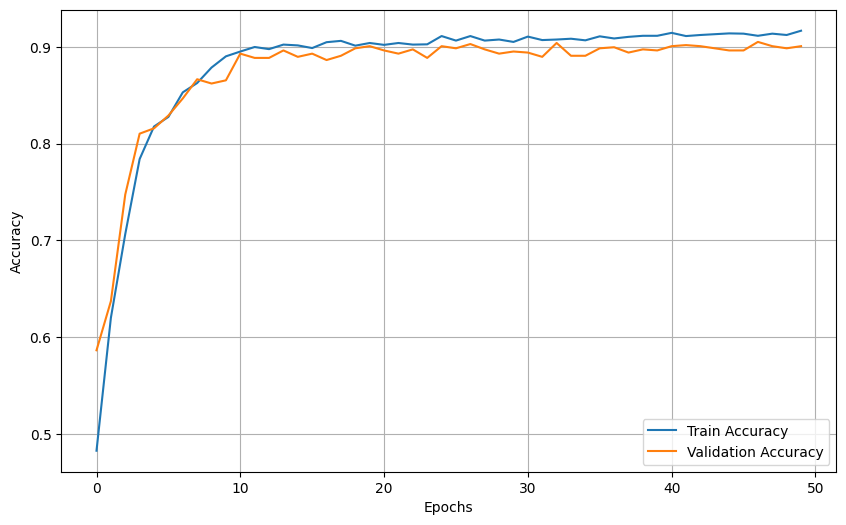

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical

# Load your dataset
df = pd.read_csv('6639leveling.csv')

# Features and target labels
features = ['Temp', 'pH', 'TDS', 'Turbidity', 'DO']
target_labels = ['Phytoplankton', 'Zooplankton']

# Prepare input data (X) and output labels (y)
X = df[features].values
y_phyto = df['Phytoplankton'].values

# Encode target labels into numerical values
label_encoder_phyto = LabelEncoder()
y_phyto_encoded = label_encoder_phyto.fit_transform(y_phyto)

# One-hot encode target labels
y_phyto_one_hot = to_categorical(y_phyto_encoded)

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D for LSTM input [samples, time steps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_phyto_one_hot, test_size=0.2, random_state=42)

# Build the RNN model using LSTM
model = Sequential()
model.add(LSTM(units=128, input_shape=(1, X_scaled.shape[2]), return_sequences=False))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=y_phyto_one_hot.shape[1], activation='softmax'))  # Multi-class output

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Generate predictions
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)

# Convert predicted numerical classes back to original labels
predicted_labels = label_encoder_phyto.inverse_transform(predicted_classes)

# Convert test labels back to single-dimensional for comparison
y_test_labels = np.argmax(y_test, axis=1)
actual_labels = label_encoder_phyto.inverse_transform(y_test_labels)

# Classification Report
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_phyto.classes_, yticklabels=label_encoder_phyto.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5-Fold Cross-Validation Accuracies: [0.9184123277664185, 0.9117971062660217, 0.9095920324325562, 0.9062844514846802, 0.9238410592079163]
Average Accuracy: 0.9139853954315186
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       190
    Level 10       1.00      1.00      1.00        15
     Level 2       1.00      1.00      1.00       145
     Level 3       0.90      0.93      0.92        29
     Level 4       0.79      0.91      0.85        76
     Level 5       0.87      0.79      0.83        52
     Level 6       0.75      0.67      0.71        45
     Level 7       0.88      0.91      0.90       166
     Level 8       0.95      0.86      0.90       132
     Level 9       0.90      1.00      0.95        56

    accuracy                           0.92       906
   macro avg       0.91      0.91      0.90       906
weighted avg       0.92      0.92      0.92       906


Con

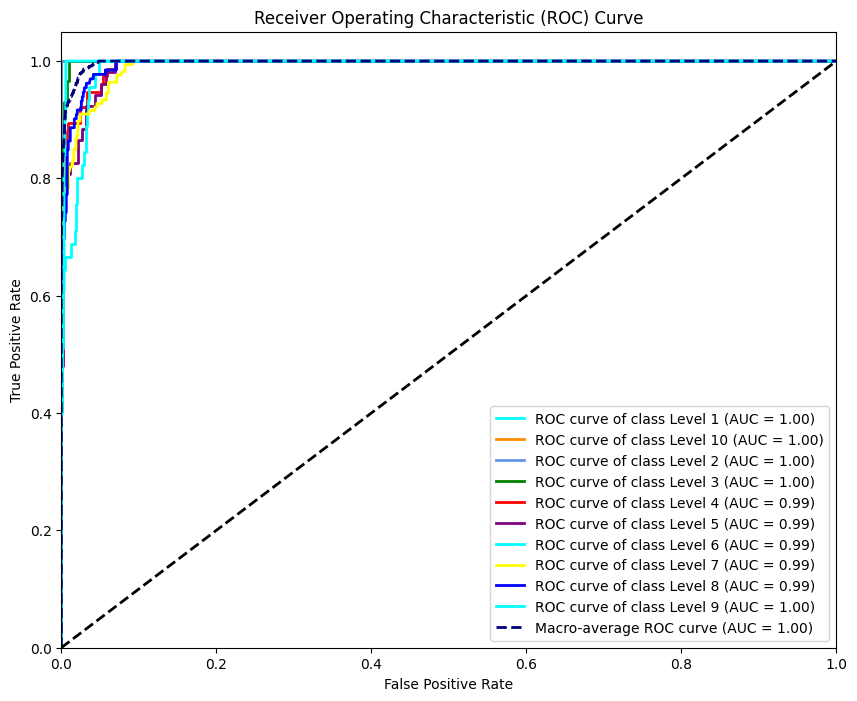

NameError: name 'history' is not defined

<Figure size 800x600 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from itertools import cycle

# Load your dataset
df = pd.read_csv('6639leveling.csv')

# Features and target labels
features = ['Temp', 'pH', 'TDS', 'Turbidity', 'DO']
target_labels = ['Phytoplankton', 'Zooplankton']

# Prepare input data (X) and output labels (y)
X = df[features].values
y_phyto = df['Zooplankton'].values

# Encode target labels into numerical values
label_encoder_phyto = LabelEncoder()
y_phyto_encoded = label_encoder_phyto.fit_transform(y_phyto)

# One-hot encode target labels
y_phyto_one_hot = to_categorical(y_phyto_encoded)

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D for LSTM input [samples, time steps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Implement 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_phyto_one_hot[train_index], y_phyto_one_hot[test_index]

    # Build the RNN model using LSTM
    model = Sequential()
    model.add(LSTM(units=128, input_shape=(1, X_scaled.shape[2]), return_sequences=False))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=y_phyto_one_hot.shape[1], activation='softmax'))  # Multi-class output

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Set verbose=0 to suppress output

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_accuracies.append(accuracy)

# Print cross-validation accuracy scores
print("5-Fold Cross-Validation Accuracies:", fold_accuracies)
print("Average Accuracy:", np.mean(fold_accuracies))

# Generate predictions on the last fold for classification report
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)

# Convert predicted numerical classes back to original labels
predicted_labels = label_encoder_phyto.inverse_transform(predicted_classes)

# Convert test labels back to single-dimensional for comparison
y_test_labels = np.argmax(y_test, axis=1)
actual_labels = label_encoder_phyto.inverse_transform(y_test_labels)

# Classification Report
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot ROC Curve and Validation Accuracy

# Binarize the actual test labels for ROC curve (since we are in a multi-class setting)
y_test_binarized = label_binarize(y_test_labels, classes=np.arange(len(label_encoder_phyto.classes_)))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_phyto_one_hot.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
fpr["macro"], tpr["macro"], _ = roc_curve(y_test_binarized.ravel(), y_pred.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'cyan', 'yellow', 'blue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {label_encoder_phyto.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot macro-average ROC curve
plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:.2f})')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3614 - loss: 2.0170 - val_accuracy: 0.5634 - val_loss: 1.2879
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5771 - loss: 1.1717 - val_accuracy: 0.6086 - val_loss: 1.0025
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6530 - loss: 0.8949 - val_accuracy: 0.6582 - val_loss: 0.8281
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7023 - loss: 0.7548 - val_accuracy: 0.7200 - val_loss: 0.7053
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7438 - loss: 0.6664 - val_accuracy: 0.7861 - val_loss: 0.6080
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7841 - loss: 0.5804 - val_accuracy: 0.8126 - val_loss: 0.5299
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8190 - loss: 0.5132 - val_accuracy: 0.8236 - val_loss: 0.4733
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8209 - loss: 0.4804 - val_accuracy: 0.

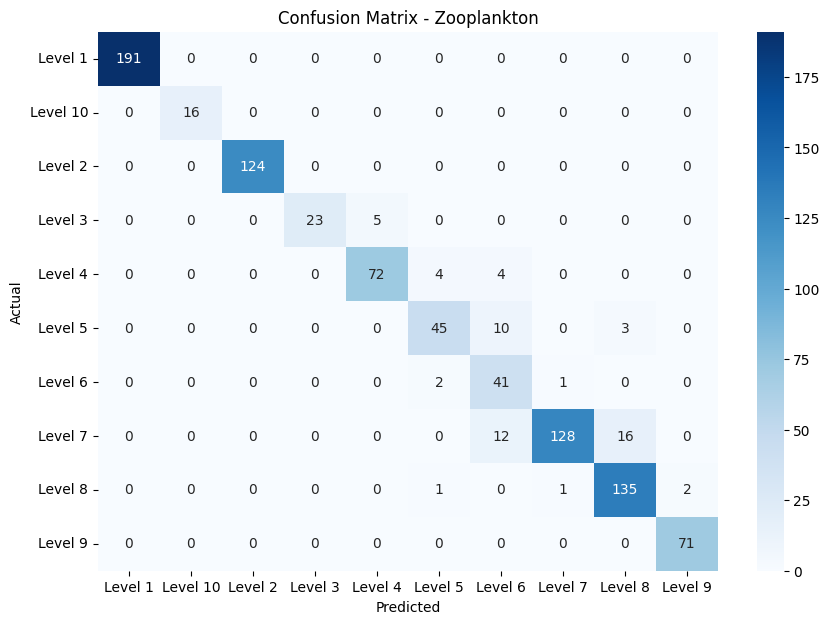

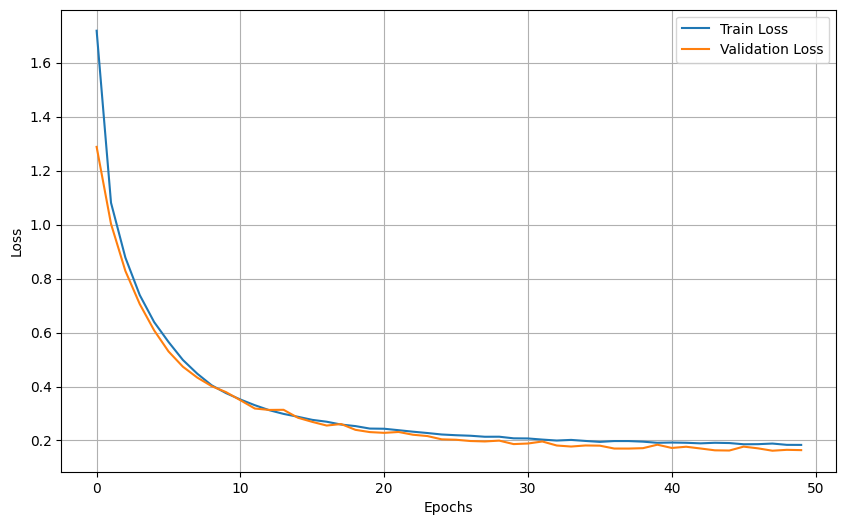

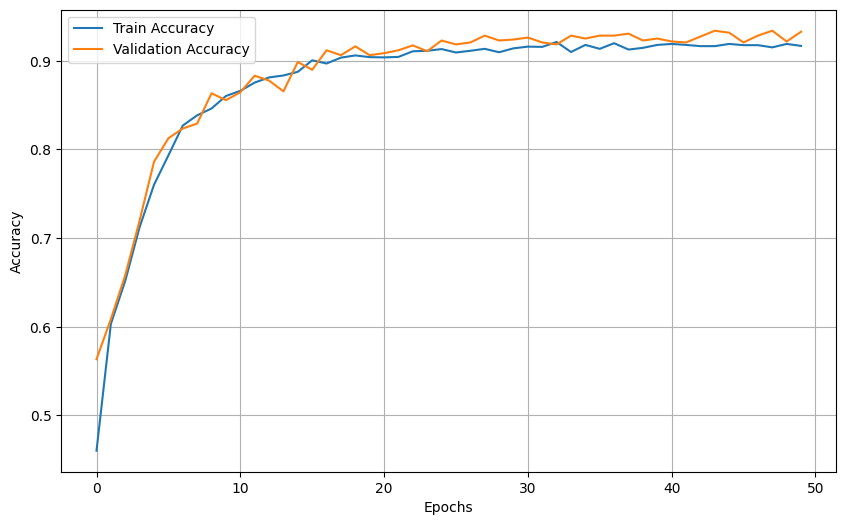

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical

# Load your dataset
df = pd.read_csv('6639leveling.csv')

# Features and target labels
features = ['Temp', 'pH', 'TDS', 'Turbidity', 'DO']
target_labels = ['Phytoplankton', 'Zooplankton']

# Prepare input data (X) and output labels (y)
X = df[features].values
y_zoo = df['Zooplankton'].values

# Encode target labels into numerical values
label_encoder_zoo = LabelEncoder()
y_zoo_encoded = label_encoder_zoo.fit_transform(y_zoo)

# One-hot encode target labels
y_zoo_one_hot = to_categorical(y_zoo_encoded)

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D for LSTM input [samples, time steps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_zoo_one_hot, test_size=0.2, random_state=42)

# Build the RNN model using LSTM
model = Sequential()
model.add(LSTM(units=128, input_shape=(1, X_scaled.shape[2]), return_sequences=False))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=y_zoo_one_hot.shape[1], activation='softmax'))  # Multi-class output

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Generate predictions
y_pred = model.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)

# Convert predicted numerical classes back to original labels
predicted_labels = label_encoder_zoo.inverse_transform(predicted_classes)

# Convert test labels back to single-dimensional for comparison
y_test_labels = np.argmax(y_test, axis=1)
actual_labels = label_encoder_zoo.inverse_transform(y_test_labels)

# Classification Report
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_zoo.classes_, yticklabels=label_encoder_zoo.classes_)
plt.title('Confusion Matrix - Zooplankton')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Loss vs. Epochs (Zooplankton)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.title('Accuracy vs. Epochs (Zooplankton)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Classification Report for fold:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       191
    Level 10       1.00      1.00      1.00        16
     Level 2       1.00      1.00      1.00       124
     Level 3       1.00      0.89      0.94        28
     Level 4       0.96      0.90      0.93        80
     Level 5       0.64      0.84      0.73        58
     Level 6       0.73      0.61      0.67        44
     Level 7       0.96      0.81      0.88       156
     Level 8       0.87      0.99      0.92       139
     Level 9       0.97      1.00      0.99        71

    accuracy                           0.93       907
   macro avg       0.91      0.91      0.91       907
weighted avg       0.93      0.93      0.93       907



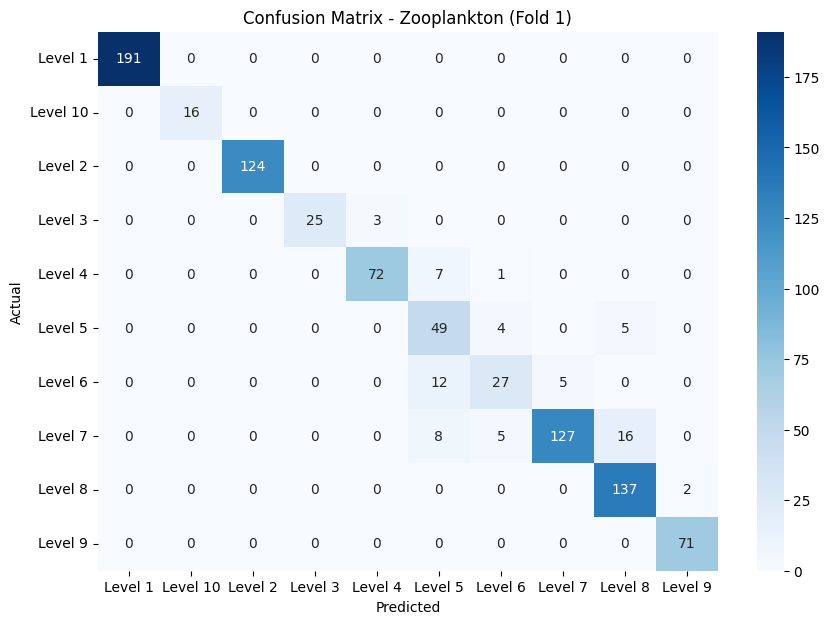

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Classification Report for fold:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       199
    Level 10       1.00      1.00      1.00         6
     Level 2       1.00      1.00      1.00       157
     Level 3       0.97      0.94      0.95        33
     Level 4       0.91      0.82      0.86        61
     Level 5       0.73      0.73      0.73        59
     Level 6       0.75      0.78      0.76        58
     Level 7       0.79      0.88      0.83       158
     Level 8       0.92      0.80      0.86       120
     Level 9       0.95      1.00      0.97        56

    accuracy                           0.91       907
   macro avg       0.90      0.89      0.90       907
weighted avg       0.91      0.91      0.91       907



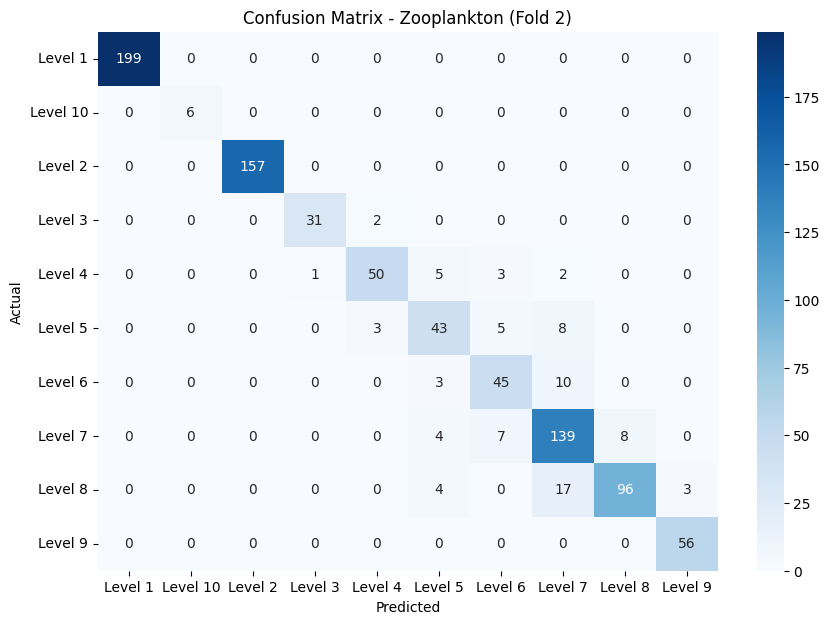

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report for fold:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       190
    Level 10       1.00      1.00      1.00        10
     Level 2       1.00      1.00      1.00       152
     Level 3       0.94      0.97      0.95        30
     Level 4       0.98      0.87      0.92        75
     Level 5       0.72      0.84      0.78        68
     Level 6       0.79      0.60      0.68        45
     Level 7       0.87      0.83      0.85       139
     Level 8       0.85      0.92      0.88       140
     Level 9       0.93      0.95      0.94        58

    accuracy                           0.92       907
   macro avg       0.91      0.90      0.90       907
weighted avg       0.92      0.92      0.91       907



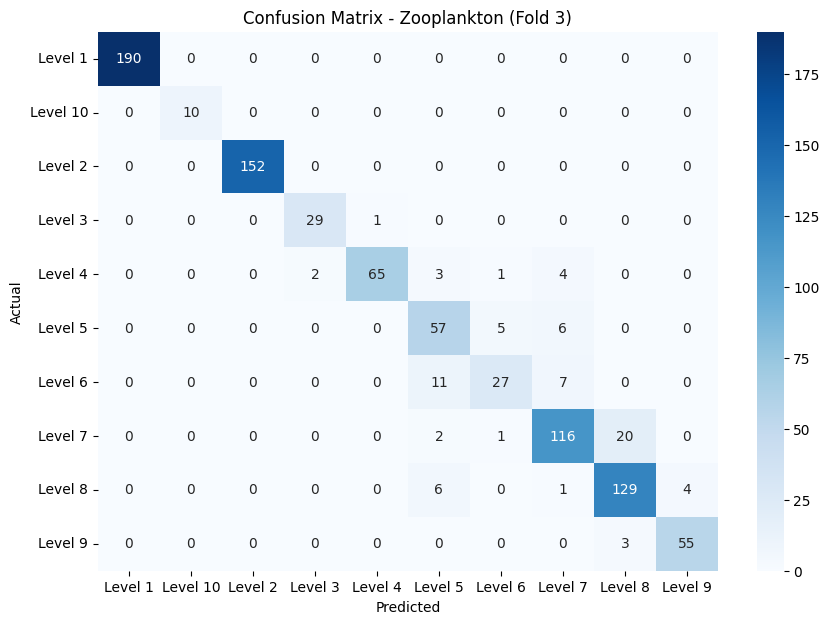

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report for fold:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       212
    Level 10       1.00      1.00      1.00        15
     Level 2       1.00      1.00      1.00       146
     Level 3       1.00      0.87      0.93        31
     Level 4       0.91      0.86      0.88        56
     Level 5       0.74      0.78      0.76        78
     Level 6       0.83      0.58      0.68        50
     Level 7       0.85      0.85      0.85       144
     Level 8       0.83      0.95      0.89       127
     Level 9       0.98      1.00      0.99        48

    accuracy                           0.91       907
   macro avg       0.91      0.89      0.90       907
weighted avg       0.92      0.91      0.91       907



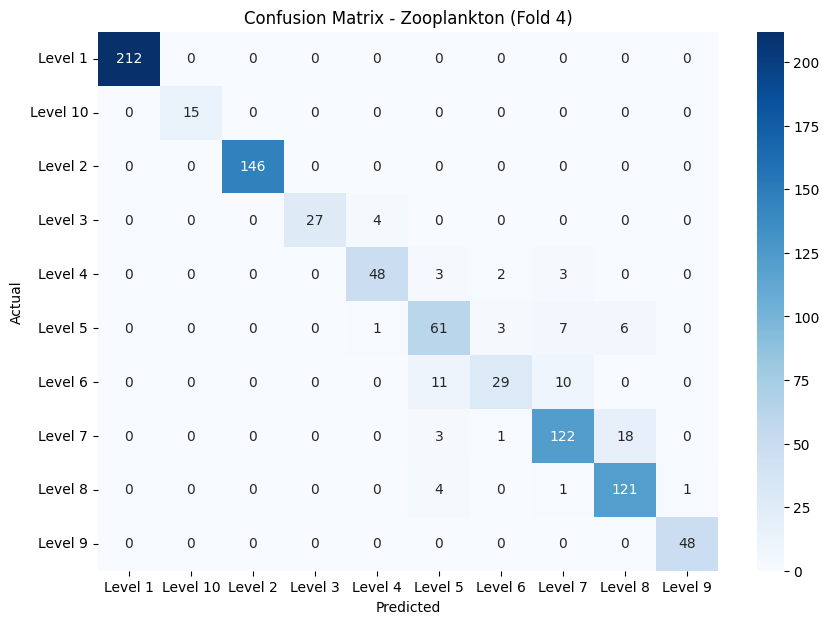

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report for fold:
              precision    recall  f1-score   support

     Level 1       1.00      1.00      1.00       190
    Level 10       1.00      1.00      1.00        15
     Level 2       1.00      1.00      1.00       145
     Level 3       0.90      0.93      0.92        29
     Level 4       0.92      0.88      0.90        76
     Level 5       0.85      0.75      0.80        52
     Level 6       0.61      0.73      0.67        45
     Level 7       0.91      0.84      0.87       166
     Level 8       0.86      0.92      0.89       132
     Level 9       0.92      0.98      0.95        56

    accuracy                           0.92       906
   macro avg       0.90      0.90      0.90       906
weighted avg       0.92      0.92      0.92       906



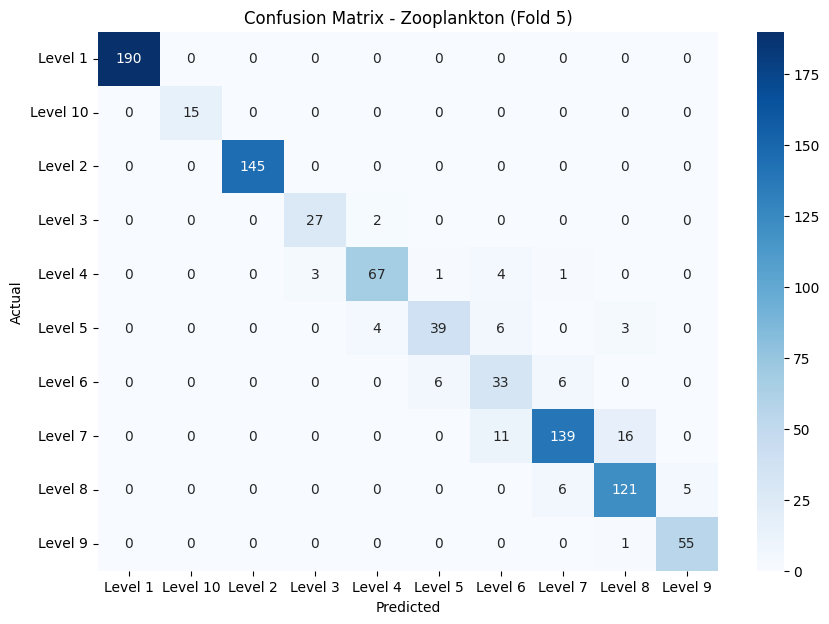

5-Fold Cross-Validation Accuracies: [0.9250275492668152, 0.9062844514846802, 0.9151047468185425, 0.9140021800994873, 0.9172185659408569]
Average Accuracy: 0.9155274987220764
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3274 - loss: 2.1248 - val_accuracy: 0.7398 - val_loss: 0.8716
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5274 - loss: 1.2900 - val_accuracy: 0.8049 - val_loss: 0.7312
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5840 - loss: 0.9812 - val_accuracy: 0.8082 - val_loss: 0.7433
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6915 - loss: 0.8254 - val_accuracy: 0.8082 - val_loss: 0.7820
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7472 - loss: 0.7029 - val_accuracy: 0.8115 - val_loss: 0.7912
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7611 - loss: 0.6340 - val_accuracy: 0.8082 - val_loss: 0.8592
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7761 - loss: 0.5877 - val_accuracy: 0.8401 - val_loss: 0.8405
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8044 - loss: 0.5170 - val_accuracy: 0.8467 - val_

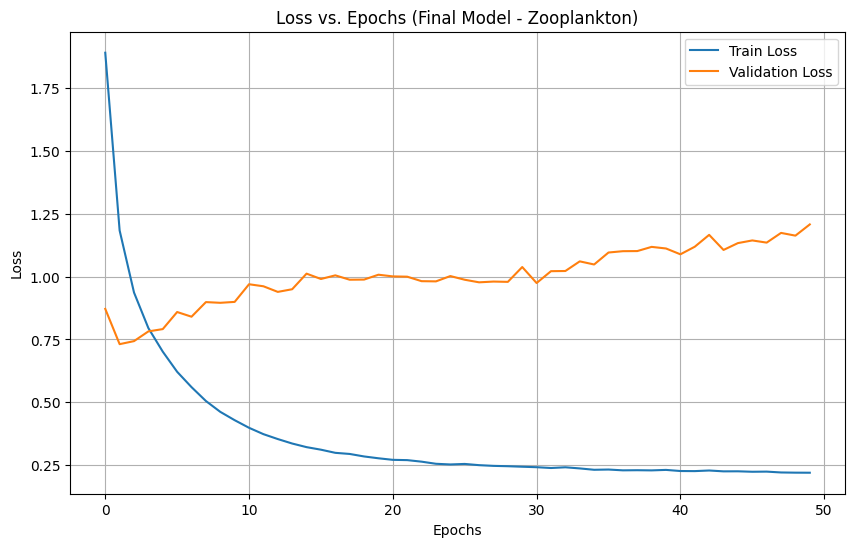

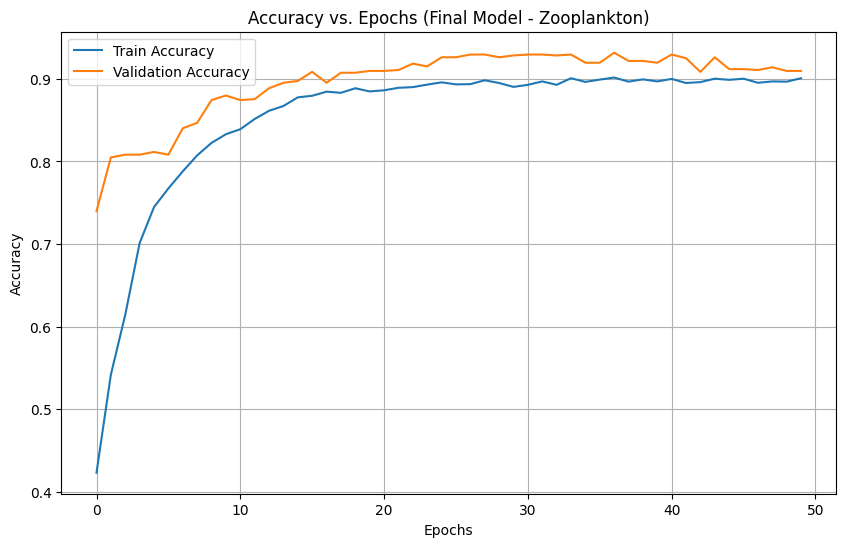

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical

# Load your dataset
df = pd.read_csv('6639leveling.csv')

# Features and target labels
features = ['Temp', 'pH', 'TDS', 'Turbidity', 'DO']
target_labels = ['Phytoplankton', 'Zooplankton']

# Prepare input data (X) and output labels (y)
X = df[features].values
y_zoo = df['Zooplankton'].values

# Encode target labels into numerical values
label_encoder_zoo = LabelEncoder()
y_zoo_encoded = label_encoder_zoo.fit_transform(y_zoo)

# One-hot encode target labels
y_zoo_one_hot = to_categorical(y_zoo_encoded)

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X to 3D for LSTM input [samples, time steps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Implement 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_zoo_one_hot[train_index], y_zoo_one_hot[test_index]

    # Build the RNN model using LSTM
    model = Sequential()
    model.add(LSTM(units=128, input_shape=(1, X_scaled.shape[2]), return_sequences=False))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=y_zoo_one_hot.shape[1], activation='softmax'))  # Multi-class output

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model and store training history
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    fold_accuracies.append(accuracy)

    # Generate predictions
    y_pred = model.predict(X_test)
    predicted_classes = np.argmax(y_pred, axis=1)

    # Convert predicted numerical classes back to original labels
    predicted_labels = label_encoder_zoo.inverse_transform(predicted_classes)

    # Convert test labels back to single-dimensional for comparison
    y_test_labels = np.argmax(y_test, axis=1)
    actual_labels = label_encoder_zoo.inverse_transform(y_test_labels)

    # Classification Report
    print("\nClassification Report for fold:")
    print(classification_report(actual_labels, predicted_labels))

    # Confusion Matrix
    conf_matrix = confusion_matrix(actual_labels, predicted_labels)

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_zoo.classes_, yticklabels=label_encoder_zoo.classes_)
    plt.title(f'Confusion Matrix - Zooplankton (Fold {len(fold_accuracies)})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print cross-validation accuracy scores
print("5-Fold Cross-Validation Accuracies:", fold_accuracies)
print("Average Accuracy:", np.mean(fold_accuracies))

# Final Model Training on All Data (Optional)
final_model = Sequential()
final_model.add(LSTM(units=128, input_shape=(1, X_scaled.shape[2]), return_sequences=False))
final_model.add(Dense(units=64, activation='relu'))
final_model.add(Dense(units=y_zoo_one_hot.shape[1], activation='softmax'))  # Multi-class output

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train final model on entire dataset
history_final = final_model.fit(X_scaled, y_zoo_one_hot, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the final model
loss_final, accuracy_final = final_model.evaluate(X_scaled, y_zoo_one_hot)
print(f'Final Model Loss: {loss_final}, Final Model Accuracy: {accuracy_final}')

# Plot the loss over epochs for final model
plt.figure(figsize=(10, 6))
plt.plot(history_final.history['loss'], label='Train Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs (Final Model - Zooplankton)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy vs Epochs for final model
plt.figure(figsize=(10, 6))
plt.plot(history_final.history['accuracy'], label='Train Accuracy')
plt.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs (Final Model - Zooplankton)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
